<h1>Quantum Computing and Classical Computing</h1>

<h2>Quantum Computing</h2>

    1.Stores information in Qubits which allows it to store 0 and 1 allowing for more complex storage. 
     [What is a qubit](https://www.quantum-inspire.com/kbase/what-is-a-qubit).
    
    2.Quantum returns a huge amount of of possible result allowing for better, best and other possible solution
    
    3.The limitless size of it computing power allows for more accuarte results
    
    4.Quantum computing shines for task such as data analysis and simulation 

<h2>Classical Computing</h2>
 
    1.Classical Store information in transistors which allows it to store 0 or 1 only
   
    2.Classical computing usally returns 1 result which means lineting possible result
    
    3.The size on which it can compute is limeted leading to it results to be limited
    
    4.Classical computing it better suited for most everyday computting task as most stuff don't need complex system to be effective at a task
    
 <br>
 <br>
 <h2>    Below are some quantum based code which perform better in quantum than in classical computing including a graphs </h2>

In [1]:
#Quantum
import qiskit
import qiskit.providers.aer as aer

<br>
$\large a+b i \qquad \qquad a, b \in \mathbb{R} \qquad \qquad 1^2= -1 \qquad \qquad \mathrm{e.g.} -2.0 + 5.0 i$

In [2]:
#Plotting.
import matplotlib.pyplot as plt
#Numerical
import numpy as np
#random numbers
import random
plt.style.use('ggplot')

In [3]:
plt.rcParams['figure.figsize'] =(20,10)
plt.style.use('seaborn-whitegrid')

In [4]:
1.0j * 1.0j

(-1+0j)

In [5]:
x = -2.0 + 5.0j
x

(-2+5j)

In [6]:
x**2

(-21-20j)

In [7]:
y=3.0+1.5j
y

(3+1.5j)

In [8]:
x+y

(1+6.5j)

In [9]:
x*y

(-13.5+12j)

In [10]:
x = [-2.0, 5.0]
y = [3.0, 1.5]

In [11]:
x

[-2.0, 5.0]

In [12]:
y

[3.0, 1.5]

In [13]:
def add(u, v):
        return [u[0] + v[0], u[1] + v[1]]

In [14]:
add(x, y)

[1.0, 6.5]

In [15]:
def mult(u, v):
    return [u[0] * v[0], u[1] * v[1]]

In [16]:
mult(x, y)

[-6.0, 7.5]

In [17]:
def proMult(u, v):
    a, b = u
    c, d = v
    return [(a*c) - (b*d), (b*c) + (a*d)]

In [18]:
proMult(x, y)

[-13.5, 12.0]

In [19]:
# A function that returns a function.
class quadratic:
    def __init__(self, a, b, c):
        self.a = a
        self.b = b
        self.c = c
        
    def __call__(self, x):
        return self.a + x**2 + self.b * x + self.c


In [20]:
p = quadratic(a=1.0, b=-5.0, c=6.0)

In [21]:
p(1.0)

3.0

In [22]:
x = np.linspace(0.0, 5.0, 1000)

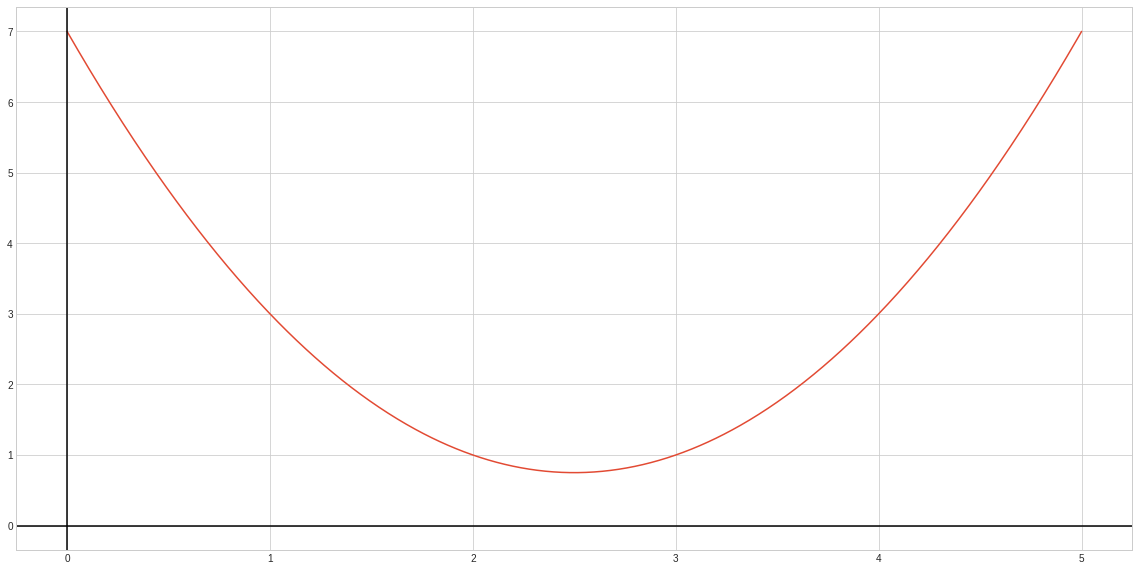

In [23]:
fig, ax = plt.subplots()
ax.plot(x, p(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

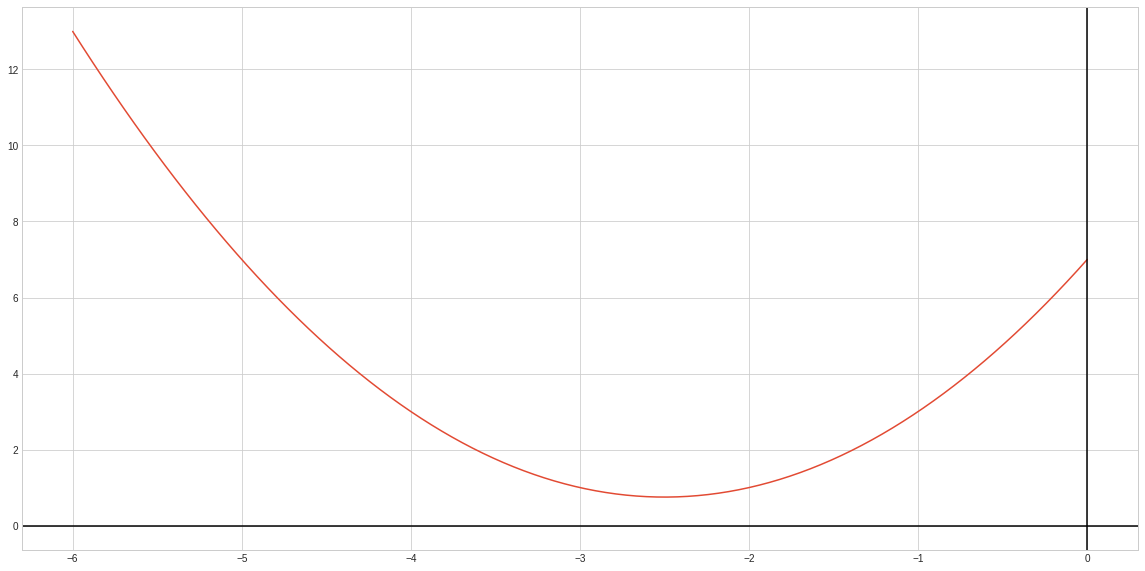

In [24]:
p = quadratic(a=1.0, b=5.0, c=6.0)
x = np.linspace(0.0, -6.0, 100)
fig, ax = plt.subplots()
ax.plot(x, p(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

In [25]:
plt.style.use('ggplot')

<h1>Deutsch's Algorithm </h1>
Deutsch's Algorithm or Deutsch-Jozsa Algorithm is an algorithm that was created in order prove that that quantum algotithms are faster the any standard algorithm for computational tool. In shows that given the following problem quantum perfoms better.
<h4>The problem
    <br>
    f({x<sub>0</sub>, x<sub>1</sub>, x<sub>2</sub>, x<sub>n</sub>, ...}) -> 0 or 1, where x<sub>n</sub> is 0 or 1
</h4>
<br>
The function is consider constant if it returns either all 0's or all 1's. balaned if it returns exactly half of 0 or 1.s


<h5>Classical</h5>
In order to determine it is balanced  for 2<sup>n</sup> inputs classical needs to perfom 2<sup>n-1</sup>+1 trial inputs in order to check for worst case situation. 
<h5>Quantuam</h5>
A quantum computer, we can solve this problem with 100% confidence after only one call to the function. 
Conclusion    

In [26]:
#Allowing a random constant/function to be added into circuit
def random_f():
    f_number = random.randint(1, 4)
    circuit = qiskit.QuantumCircuit(2,1)
    #constant 0 function
    if f_number == 1:
        circuit.i(1)
    #constant 1 function
    elif f_number == 2:
        circuit.x(1)
    #balanced idenity constant
    elif f_number == 3:
        circuit.cnot(0, 1)
    #balanced not constant
    elif f_number == 4:
        circuit.cnot(0, 1)
        circuit.x(1)
    else:
        print("erroe")
    return circuit


Create first part of circuit

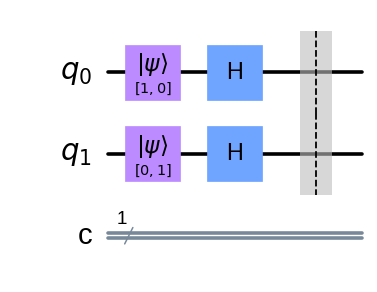

In [27]:
#Create the first part in the circuit
circuit = qiskit.QuantumCircuit(2,1)
circuit.initialize([1, 0],0)
circuit.initialize([0, 1],1)
circuit.h((0, 1))
circuit.barrier()
circuit.draw(output='mpl', scale=1.8)

Create Second part of circuit

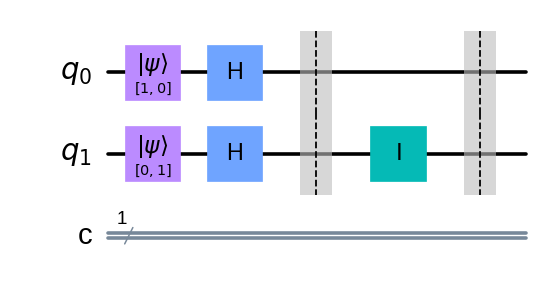

In [28]:
#Calls the random and adds it to the circuit
circuit.compose(random_f(), inplace=True)
circuit.barrier()
circuit.draw(output='mpl', scale=1.8)

Create third part of circuit

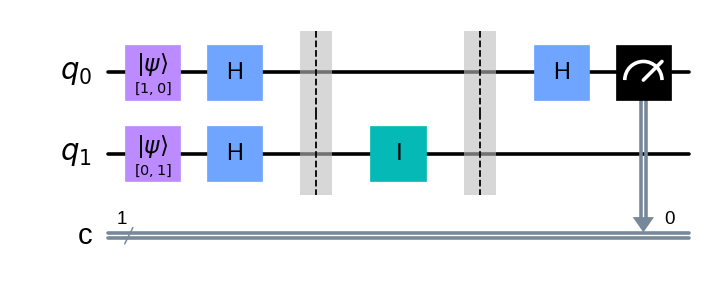

In [29]:
#add a final part and end to the circuit
circuit.h(0)
circuit.measure(0,0)
circuit.draw(output='mpl', scale=1.8)

<h2> Simulate and Decide

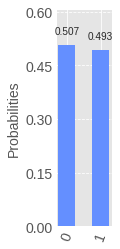

In [30]:
#allows the circuit to be ran several times in order to show probability
circuit.compose(random_f(), inplace=True)
circuit.barrier()
circuit.h(0)
circuit.measure(0,0)
simulator =aer.QasmSimulator()
compcircuit = qiskit.transpile(circuit, simulator)
job = simulator.run(compcircuit, shorts=1000)
results = job.result()
counts = results.get_counts()
#prints out a visual graph of the circuit show the probabilities of get a 0 or 1, 
qiskit.visualization.plot_histogram(counts, figsize=(1,4))